In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as matdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

C:\Users\djgoo\AppData\Local\Temp\ipykernel_20808\1489938809.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

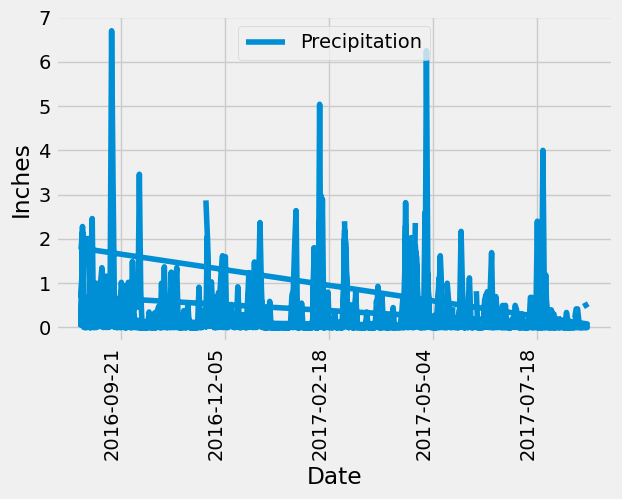

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = (dt.date(2017, 8, 23) - dt.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
prev_year_prec = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precdf = pd.DataFrame(prev_year_prec, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precdf['Date'] = pd.to_datetime(precdf['Date'])
precdf.sort_values(by='Date')
precdf = precdf.set_index(['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
ax = precdf.plot()
ax.xaxis.set_major_locator(matdates.DayLocator(interval=75))
ax.xaxis.set_major_formatter(matdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
Stats_Summary = precdf.describe()

Stats_Summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_sts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
active_sts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"Station USC00519281:")
print(f"Min temp:{min_temp}", f"Max temp:{max_temp}", f"Avg temp:{avg_temp}")

Station USC00519281:
Min temp:[(54.0,)] Max temp:[(85.0,)] Avg temp:[(71.66378066378067,)]


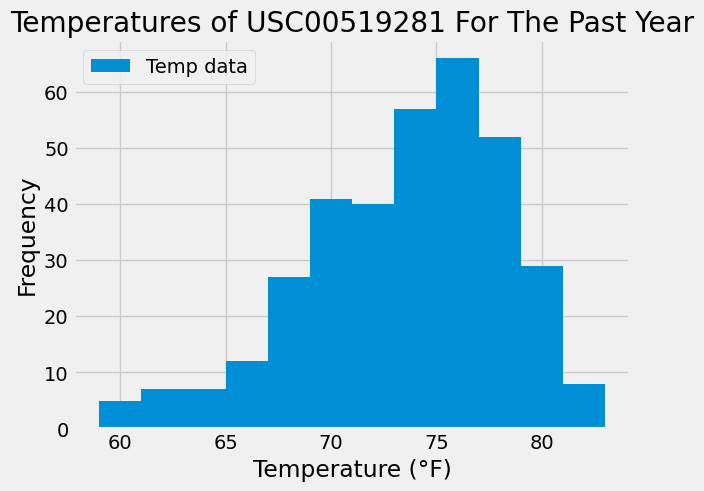

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
    filter(Measurement.date > '2016-08-23').all()
active_sts_temps = pd.DataFrame(results, columns = ['Temp data'])
active_station_hist = active_sts_temps.hist(bins=12, legend=True)
plt.ylabel("Frequency")
plt.xlabel("Temperature (°F)")
plt.title("Temperatures of USC00519281 For The Past Year")
plt.show()

# Close Session

In [35]:
# Close Session
session.close()